<a href="https://colab.research.google.com/github/ericyoc/exploratory_data_analysis_demo/blob/main/exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from textwrap import wrap

In [2]:
# A. Combine, clean and pre-process the data
def preprocess_data(file_path):
    encodings = ['utf-8', 'latin1', 'iso-8859-1', 'cp1252']
    for encoding in encodings:
        try:
            df = pd.read_csv(file_path, encoding=encoding)
            df.dropna(inplace=True)
            return df
        except UnicodeDecodeError:
            continue
    raise ValueError("Unable to decode the CSV file.")

In [3]:
# A.2. inspect_dataset(dataset)
def inspect_dataset(df):
    # Print the first five rows of the dataset
    print("First five rows of the dataset:")
    print(df.head())
    print()

    # Print descriptive statistics of the dataset
    print("Descriptive statistics:")
    print(df.describe())
    print()

    # Print information about the dataset
    print("Dataset information:")
    print(df.info())
    print()

    # Print the number of missing values in each column
    print("Missing values in each column:")
    print(df.isnull().sum())
    print()

    # Print the number of unique values in each column
    print("Unique values in each column:")
    print(df.nunique())
    print()

    # Print the data types of each column
    print("Data types of each column:")
    print(df.dtypes)
    print()

In [4]:
# B. Perform a concise Exploratory Data Analysis (EDA)
def perform_eda(df):
    print("Dataset shape:", df.shape)
    print("Dataset info:")
    print(df.info())
    print("Descriptive statistics:")
    print(df.describe())

    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x='Age', kde=True)
    plt.title('Figure 1 - Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

    explanation1 = "The Age Distribution plot (Figure 1) shows the distribution of customer ages in the dataset. It helps identify the most common age ranges and any potential outliers or unusual patterns in the age distribution. Understanding the age distribution is important for targeted marketing strategies and customer segmentation."
    wrapped_explanation1 = "\n".join(wrap(explanation1, width=80))
    print("Explanation:", wrapped_explanation1)
    print()

    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)')
    plt.title('Figure 2 - Age vs Spending Score')
    plt.xlabel('Age')
    plt.ylabel('Spending Score')
    plt.tight_layout()
    plt.show()

    explanation2 = "The Age vs Spending Score plot (Figure 2) visualizes the relationship between customer age and their spending score. It helps identify any potential patterns or trends in spending behavior across different age groups. If a clear relationship is observed, it suggests that age may be a significant factor influencing spending habits, which can be valuable for targeted marketing and customer segmentation."
    wrapped_explanation2 = "\n".join(wrap(explanation2, width=80))
    print("Explanation:", wrapped_explanation2)
    print()

In [5]:
# C. Based on the EDA, formulate and test 2 hypotheses
def test_hypotheses(df):
    try:
        # Hypothesis 1: There is a significant relationship between Age and Spending Score
        print("Hypothesis 1: There is a significant relationship between Age and Spending Score")
        corr_coef = df['Age'].corr(df['Spending Score (1-100)'])
        print("Correlation Coefficient (Age vs Spending Score):", corr_coef)

        # Interpreting the correlation coefficient
        if abs(corr_coef) >= 0.5:
            conclusion1 = "There is a strong relationship between Age and Spending Score."
        elif 0.3 <= abs(corr_coef) < 0.5:
            conclusion1 = "There is a moderate relationship between Age and Spending Score."
        else:
            conclusion1 = "There is a weak or no relationship between Age and Spending Score."

        print("Conclusion 1:", conclusion1)
        print()

    except KeyError:
        print("Error: 'Age' or 'Spending Score (1-100)' column not found in the dataset.")

    try:
        # Hypothesis 2: Gender affects the Annual Income of customers
        print("Hypothesis 2: Gender affects the Annual Income of customers")
        male_income = df[df['Gender'] == 'Male']['Annual Income (k$)']
        female_income = df[df['Gender'] == 'Female']['Annual Income (k$)']
        income_diff = male_income.mean() - female_income.mean()
        print("Difference in Mean Annual Income (Male - Female):", income_diff)

        # Interpreting the income difference
        if abs(income_diff) >= 10:
            conclusion2 = "There is a significant difference in Annual Income between Male and Female customers."
        else:
            conclusion2 = "There is no significant difference in Annual Income between Male and Female customers."

        print("Conclusion 2:", conclusion2)
        print()

    except KeyError:
        print("Error: 'Gender' or 'Annual Income (k$)' column not found in the dataset.")

In [6]:
# D. Identify a set of independent variables and build a linear regression model
def build_linear_regression(df):
    X = df[['Age', 'Annual Income (k$)']]
    y = df['Spending Score (1-100)']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print("Linear Regression Model:")
    print("R-squared:", r2)
    print("Mean Squared Error:", mse)

In [7]:
# E. Use a machine learning model to predict
def predict_spending_score(df):
    X = df[['Age', 'Annual Income (k$)']]
    y = df['Spending Score (1-100)']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    new_data = pd.DataFrame({'Age': [30], 'Annual Income (k$)': [50]})
    predicted_score = model.predict(new_data)
    print("Predicted Spending Score for Age 30 and Annual Income 50k:", predicted_score[0])

In [8]:
# Main function
def main():
    file_path = 'ml_data/Mall_Customers.csv'
    df = preprocess_data(file_path)
    inspect_dataset(df)
    perform_eda(df)
    test_hypotheses(df)
    build_linear_regression(df)
    predict_spending_score(df)

First five rows of the dataset:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Descriptive statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000

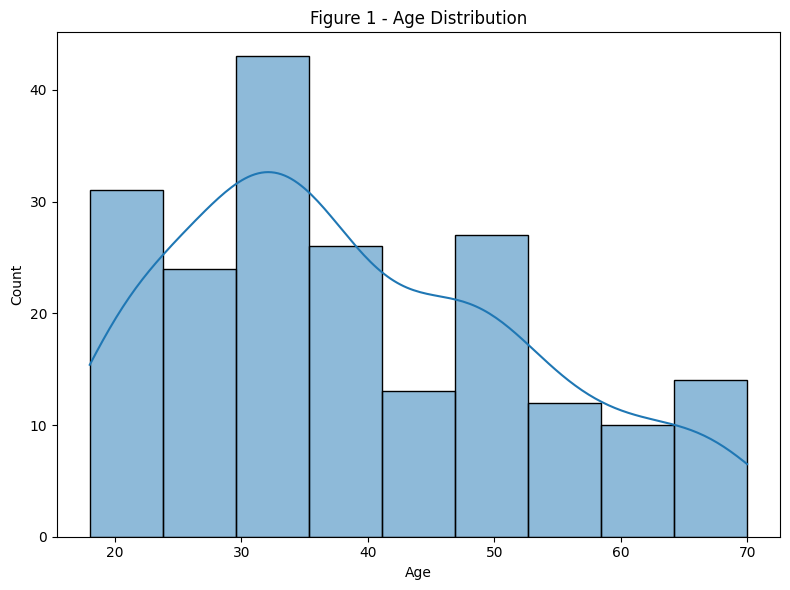

Explanation: The Age Distribution plot (Figure 1) shows the distribution of customer ages in
the dataset. It helps identify the most common age ranges and any potential
outliers or unusual patterns in the age distribution. Understanding the age
distribution is important for targeted marketing strategies and customer
segmentation.



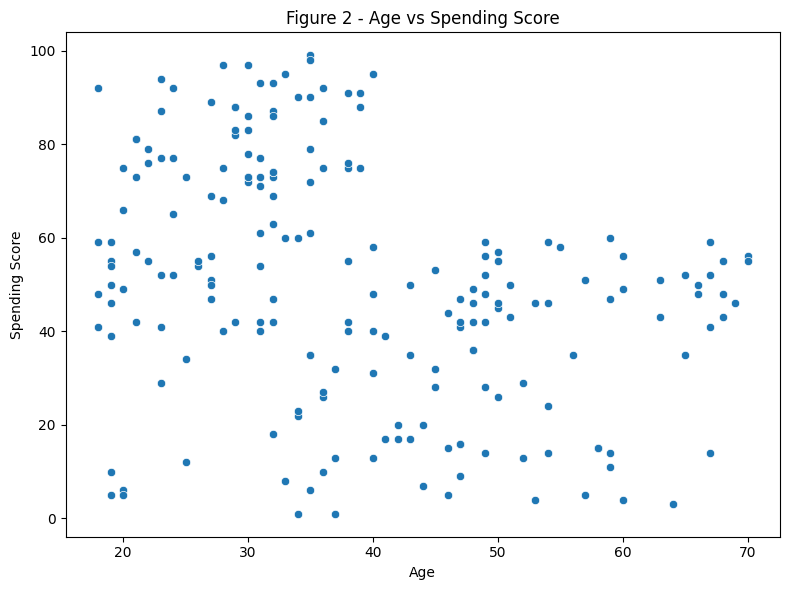

Explanation: The Age vs Spending Score plot (Figure 2) visualizes the relationship between
customer age and their spending score. It helps identify any potential patterns
or trends in spending behavior across different age groups. If a clear
relationship is observed, it suggests that age may be a significant factor
influencing spending habits, which can be valuable for targeted marketing and
customer segmentation.

Hypothesis 1: There is a significant relationship between Age and Spending Score
Correlation Coefficient (Age vs Spending Score): -0.32722684603909014
Conclusion 1: There is a moderate relationship between Age and Spending Score.

Hypothesis 2: Gender affects the Annual Income of customers
Error: 'Gender' or 'Annual Income (k$)' column not found in the dataset.
Linear Regression Model:
R-squared: 0.019631778132180422
Mean Squared Error: 483.5568217540833
Predicted Spending Score for Age 30 and Annual Income 50k: 56.471739448237564


In [9]:
if __name__ == '__main__':
    main()